In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data cleaning

In [3]:
# verificam coloanele care nu au valori
# check the columns with no values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# stergem coloana "Cabin"
# delete the column "Cabin"
df.drop(["Cabin"],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
df["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [8]:
# verificam valorile lipsa din coloana "Age" pentru "Sex"=="female"
# check the missing values in the column "Age" for "Sex"=="female"
mask_female=df["Sex"]=="female"
df[mask_female]["Age"].isnull().sum()

53

In [9]:
# calculam valoarea mediana pt "Age" pentru coloana "Sex", "female"
# calculate the median value for "Age" where "Sex"=="female"
mask_female=df["Sex"]=="female"
median_age_female=df[mask_female]["Age"].median()
print("Valoarea mediană a vârstei pentru femei:", median_age_female)

Valoarea mediană a vârstei pentru femei: 27.0


In [10]:
# inlocuim valorile lipsa din colana Age , pentru "Sex"=="female"
#cu Valoarea mediană a vârstei pentru femei: 27.0
# filling the missing values from column "Age" with median value for "Sex"=="female": 27.0
df.loc[mask_female,"Age"]=df.loc[mask_female,"Age"].fillna(value=median_age_female)

In [11]:
df.loc[mask_female].info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 1 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  314 non-null    int64  
 1   Survived     314 non-null    int64  
 2   Pclass       314 non-null    int64  
 3   Name         314 non-null    object 
 4   Sex          314 non-null    object 
 5   Age          314 non-null    float64
 6   SibSp        314 non-null    int64  
 7   Parch        314 non-null    int64  
 8   Ticket       314 non-null    object 
 9   Fare         314 non-null    float64
 10  Embarked     312 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 29.4+ KB


In [12]:
# verificam ca s-a facut inlocuirea pe coloana "Age"
# verifying that the replacement has been made for column "Age"
df.loc[mask_female,"Age"].isnull().sum()

0

In [13]:
len(df[mask_female])

314

In [14]:
# verificam cate valori avem lipsa pentru colana "Age" -male
# check the missing values in the column "Age" for "Sex"=="male"
mask_male=df["Sex"]=="male"
df[mask_male]["Age"].isnull().sum()

124

In [15]:
df[mask_male].info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    object 
 5   Age          453 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Embarked     577 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 54.1+ KB


In [16]:
# calculam valoarea mediana pt "Age" pentru coloana "Sex", "male"
# calculate the median value for "Age" where "Sex"=="male"
mask_male=df["Sex"]=="male"
median_age_male=df[mask_male]["Age"].median()
print("Valoarea mediana a varstei pentru barbati:", median_age_male)

Valoarea mediana a varstei pentru barbati: 29.0


In [17]:
# inlocuim valorile lipsa din colana Age , pentru "Sex"=="male" 
#cu Valoarea mediana a varstei pentru barbati: 29.0
# filling the missing values from column "Age" with median value for "Sex"=="male": 29.0
df.loc[mask_male,"Age"]=df.loc[mask_male,"Age"].fillna(value=median_age_male)

In [18]:
df.loc[mask_male].info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Embarked     577 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 54.1+ KB


In [19]:
# verificam ca s-a facut inlocuirea pe coloana "Age"
# verifying that the replacement has been made for column "Age"
df.loc[mask_male,"Age"].isnull().sum()

0

In [20]:
# verificam cate valori avem lipsa pe coloaba "Emarked"
# check for missing values for column "Embarked"
df["Embarked"].isnull().sum()

2

In [21]:
# care este portul din care s-au imbarcat cei mai multi pasageri?
# from which port most passangers boarded?
df.groupby("Embarked")["PassengerId"].count().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: PassengerId, dtype: int64

In [22]:
# inlocuim valorile lipsa de pe colana "Embarked" cu "S" 
# filling the missing values on "Emarked" with "S"
df["Embarked"]=df["Embarked"].fillna(value="S")

In [23]:
# verificam ca s-a facut inlocuirea pe coloana "Embarked" cu "S" 
#verifying the replacement
df["Embarked"].isnull().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Distributia pasagerilor in functie de sex
### Gender distribution

In [25]:
# distributia pasagerilor in functie de sex
# gender distribution
plot1=df.groupby("Sex")["PassengerId"].count().plot.pie(colors=("#FF0066","#0099FF"),
                                                        labels=("Female","Male"),
                                                        autopct="%1.1f%%",
                                                        pctdistance=0.7,
                                                        shadow=True,
                                                        explode=(0.1,0),
                                                        figsize=(5,5),
                                                        title="Passengers's distribution by gender",
                                                        ylabel="")


In [26]:
plot1.figure.savefig("Sex distrubution.png",bbox_inches="tight")

In [27]:
# sau
# or
plt.figure(figsize=(7,4))
plot1_1=sns.countplot(x="Sex", hue="Sex", data=df, palette=["#0099FF", "#FF0066"], edgecolor="black")
plot1_1.bar_label(plot1_1.containers[0])

[Text(0, 0, '577')]

In [28]:
plot1_1.figure.savefig("Sex distrubution_1.png",bbox_inches="tight")

### Distributia pasagerilor in functie de sex si de faptul ca au supravituit sau nu
### Passenger distribuion by gender and if they survived

In [29]:
# numarul barbatilor care au supravietuit
# no of men who survived
df[mask_male]["Survived"].sum()

109

In [30]:
# numarul femeilor care au supravietuit
# no of women who survived
df[mask_female]["Survived"].sum()

233

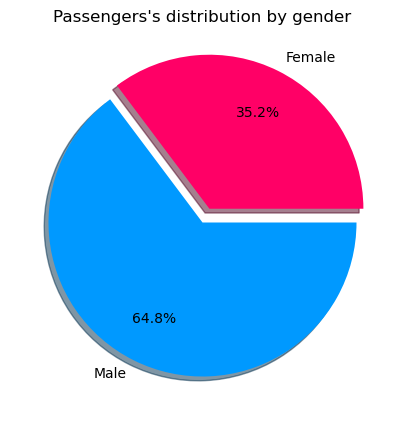

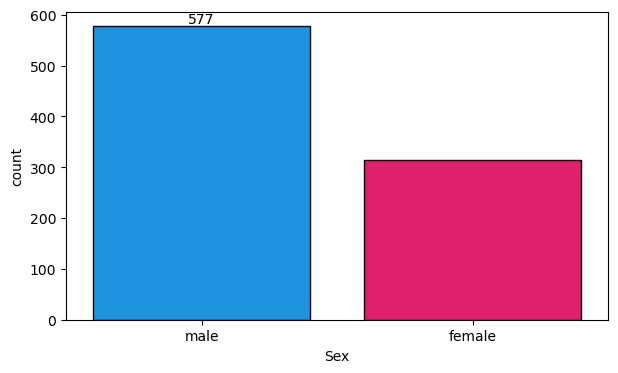

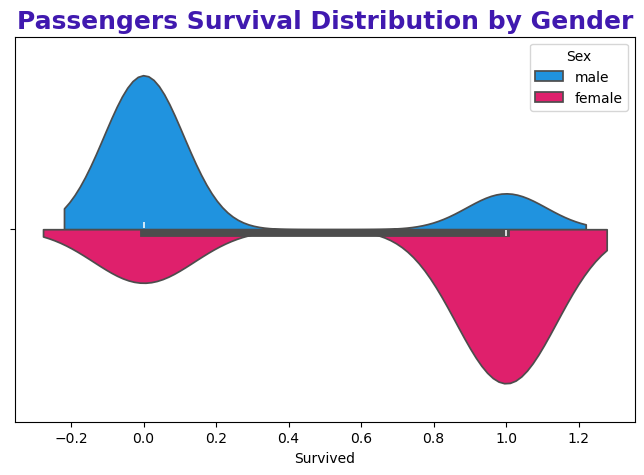

In [31]:
# distribuita pasagerilor in functie de sex si daca au supravietuit sau nu
# passenger distribuion by gender and if they survived
plt.figure(figsize=(8,5))
p2 = sns.violinplot(
    data=df,
    x="Survived",
    hue="Sex",
    palette=["#0099FF", "#FF0066"],
    split=True)
plt.title("Passengers Survival Distribution by Gender", fontsize=18, fontweight="bold", color="#4019AF")
plt.show()

In [32]:
sns.violinplot(data=df,x="Sex",y="Survived",hue="Sex",palette=["#0099FF","#FF0066"])
sns.swarmplot(data=df,x="Sex",y="Survived",color="white", size=1)
plt.title("Passengers Survival Distribution by Gender", fontsize=18, fontweight="bold", color="#4019AF")

C:\Users\telet\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\telet\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Passengers Survival Distribution by Gender')

C:\Users\telet\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\telet\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


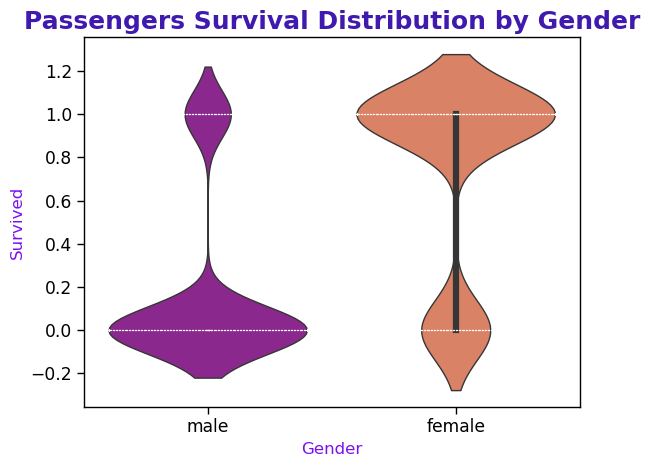

In [116]:
plot2_2=sns.violinplot(data=df,x="Sex",y="Survived",hue="Sex",palette="plasma")
plot2_2=sns.swarmplot(data=df,x="Sex",y="Survived",color="white", size=1)
plt.title("Passengers Survival Distribution by Gender", fontsize=18, fontweight="bold", color="#4019AF")
plt.xlabel("Gender",
           fontweight="light",
           color="#7B11EF",
           fontsize="12")
plt.ylabel("Survived",
           fontweight="light",
           color="#7B11EF",
           fontsize="12")
plt.show()

In [117]:
plot2_2.figure.savefig("Sex suvival_2.png",bbox_inches="tight")

### Distributia pasagerilor in functie de varsta si sex
### Passenger distribution by gender and age

<Figure size 1000x700 with 0 Axes>

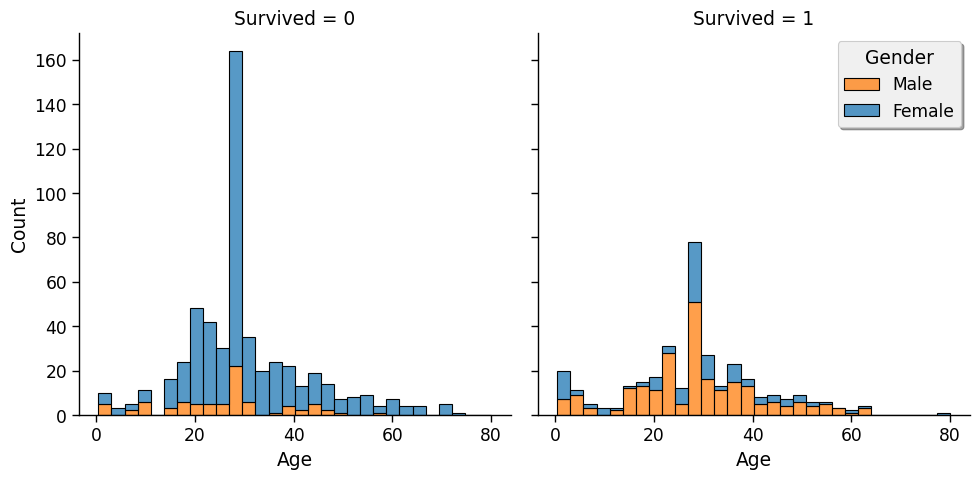

<Figure size 1000x700 with 0 Axes>

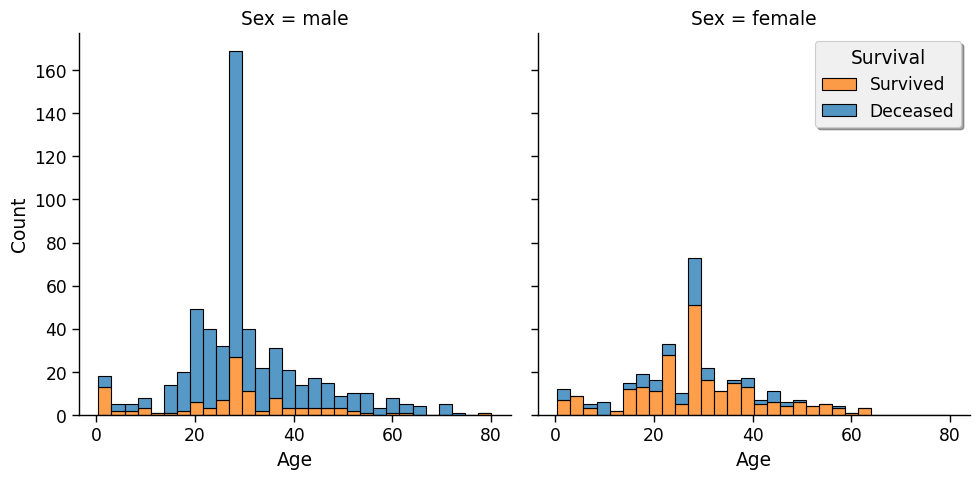

<Figure size 1000x700 with 0 Axes>

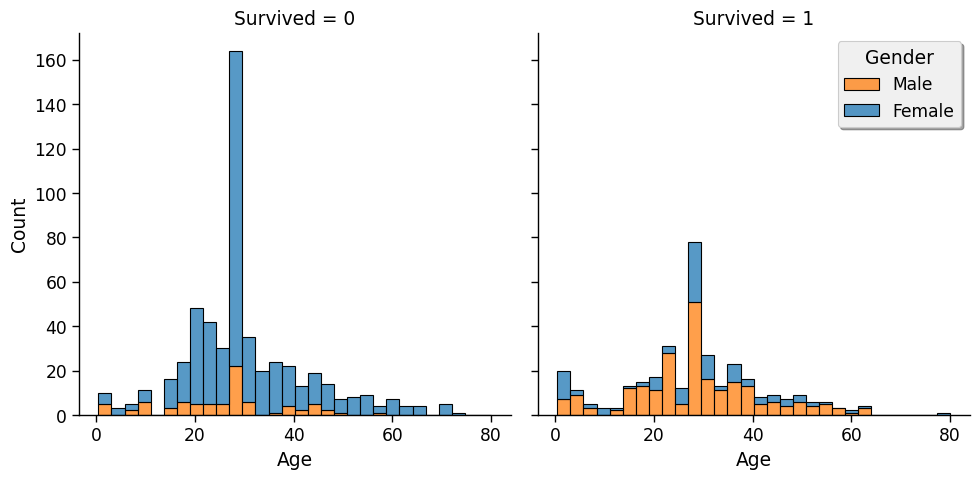

In [120]:
# distribution of passengers by age
plt.figure(figsize=(10,7))
sns.displot(df,x="Age",hue="Sex",multiple="stack",col="Survived", legend=False)
plt.legend(loc="best",labels=["Male","Female"],shadow=True,framealpha=1,facecolor="0.94",title="Gender")
plt.show()

<Figure size 1000x700 with 0 Axes>

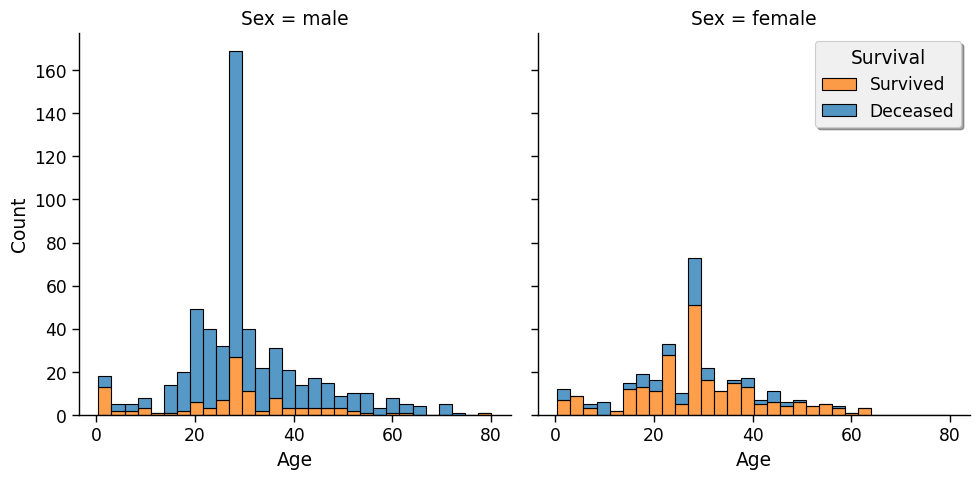

In [121]:
# distribution of passengers by age
plt.figure(figsize=(10,7))
plot3_3=sns.displot(df,x="Age",hue="Survived",multiple="stack", col="Sex", legend=False)
plt.legend(loc="best",labels=["Survived","Deceased"],shadow=True,framealpha=1,facecolor="0.94",title="Survival")
plt.show()

In [122]:
plot3_3.figure.savefig("Gender_Age_Survived_2.png")

<Figure size 1000x700 with 0 Axes>

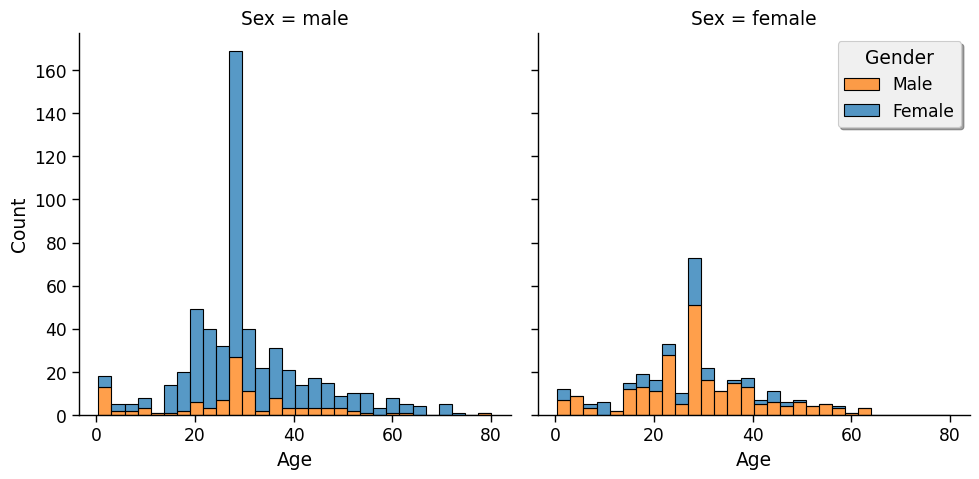

In [123]:
# distribution of passengers by age
plt.figure(figsize=(10,7))
plot3=sns.displot(df,x="Age",hue="Survived",multiple="stack", col="Sex", legend=False)
plt.legend(loc="best",labels=["Male","Female"],shadow=True,framealpha=1,facecolor="0.94",title="Gender")
plt.show()

In [124]:
plot3.figure.savefig("Gender_Age_Survived.png")

### Correlation matrix

In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category,family_size,passanger_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,young adults,1,accompanied passanger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adults,1,accompanied passanger
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,young adults,0,solo passanger
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adults,1,accompanied passanger
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adults,0,solo passanger


In [126]:
corr_mtx=df[["Survived","Pclass","Age","Fare"]].corr()
corr_mtx

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.338481,-0.073296,0.257307
Pclass,-0.338481,1.000000,-0.338056,-0.549500
Age,-0.073296,-0.338056,1.000000,0.094161
Fare,0.257307,-0.549500,0.094161,1.000000


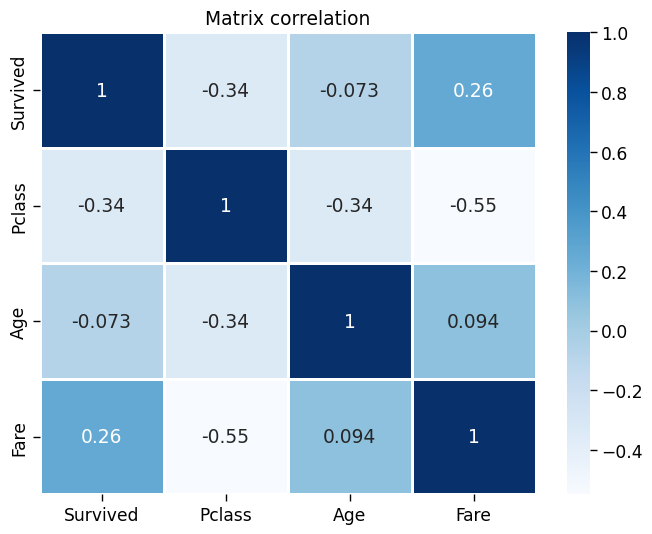

In [127]:
plt.figure(figsize=(8,6))
sns.set_context("paper",font_scale=1.4)
plot4=sns.heatmap(corr_mtx,cmap="Blues",annot=True,linecolor="white",linewidth=1)
plt.title("Matrix correlation")
plt.show()

In [128]:
plot4.figure.savefig("Matrix_correlation.png")


In [129]:
corr_mtx1=df[["Survived","Pclass","Age","Fare","SibSp","Parch"]].corr()
corr_mtx1

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.073296,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.338056,-0.549500,0.083081,0.018443
Age,-0.073296,-0.338056,1.000000,0.094161,-0.236376,-0.176038
Fare,0.257307,-0.549500,0.094161,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.236376,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.176038,0.216225,0.414838,1.000000


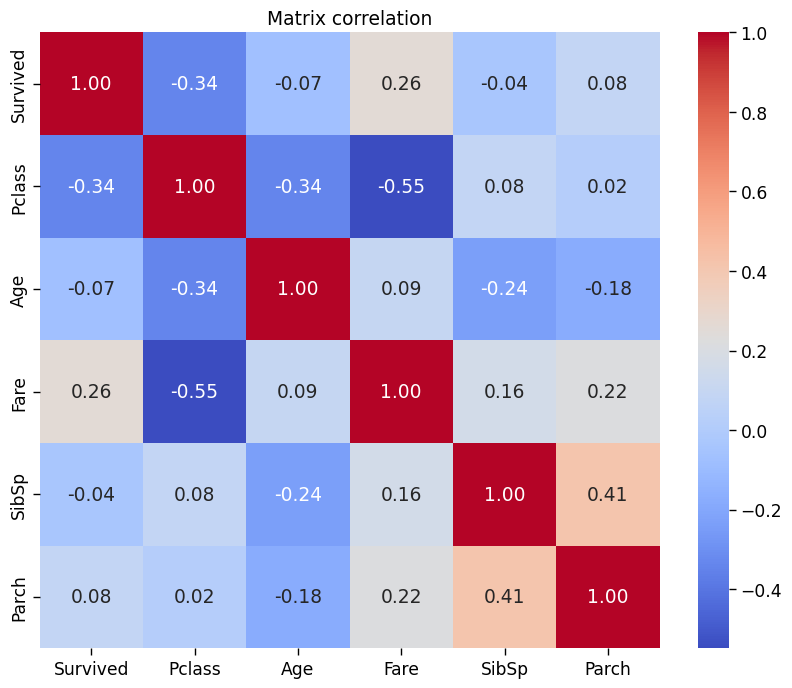

In [131]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mtx1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrix correlation")
plt.show()

In [132]:
# corelatie pozitiva intre Survived si Fare (cu cat pretul e mai mare, cu atat sansele de supravietuire cresc -probabil pasageri
#imbarcati la clasa 1, care au avut acees la barcile de salvare)
#corelația dintre Age și Survived poate fi ușor negativă sau aproape de zero. Dacă este negativă, indică faptul că vârsta mai înaintată este
#asociată cu o rată mai mică de supraviețuire. Copiii și tinerii au avut uneori o prioritate mai mare în operațiunile de salvare, însă corelația 
#nu e întotdeauna semnificativă
#Survived și Pclass: Corelația poate fi negativă, ceea ce sugerează că, cu cât clasa (Pclass) este mai mare (clasa 3 față de clasa 1), 
#șansele de supraviețuire scad. Aceasta ar putea indica faptul că pasagerii din clasele superioare au avut acces mai rapid la bărci de 
# salvare și resurse.
#Positive correlation between Survived and Fare (the higher the price, the higher the chances of survival - probably passengers boarded in 1st class, who had access to lifeboats)

# The correlation between Age and Survived can be slightly negative or close to zero. If it is negative, it indicates that older age is associated with a lower survival rate. 
# Children and young people sometimes had a higher priority in rescue operations, but the correlation is not always significant.
# Survived and Pclass: The correlation may be negative, which suggests that the higher the class (Pclass) (class 3 versus class 1), the lower the chances of survival. 
# This could indicate that passengers in the upper classes had faster access to lifeboats and resources



In [133]:
## Survived:
# Survived și Pclass: Corelația poate fi negativă, ceea ce sugerează că, cu cât clasa (Pclass) este mai mare (clasa 3 față de clasa 1), 
#șansele de supraviețuire scad. Aceasta ar putea indica faptul că pasagerii din clasele superioare au avut acces mai rapid la bărci de 
# salvare și resurse.
# Survived și Fare: O corelație pozitivă ar sugera că pasagerii care au plătit mai mult pentru bilete au avut șanse mai mari să supraviețuiască,
# posibil deoarece se aflau în clasele superioare (clasa 1).
#Survived și Age: Această corelație poate fi ușor negativă sau aproape de zero. Dacă este negativă, indică faptul că vârsta mai înaintată este
#asociată cu o rată mai mică de supraviețuire. Copiii și tinerii au avut uneori o prioritate mai mare în operațiunile de salvare, însă corelația 
#nu e întotdeauna semnificativă
## Pclass (clasa biletului):
# Pclass și Fare: Corelația este probabil puternic negativă, deoarece cei din clasa 1 (valori mici în Pclass) au plătit tarife mai mari decât cei 
#din clasele inferioare. Acest lucru indică faptul că prețul biletului scade pe măsură ce clasa biletului crește
# Pclass și Age: Corelația între clasă și vârstă poate fi ușor pozitivă, deoarece pasagerii din clasele inferioare (clasa 3) erau adesea mai tineri
#și călătoreau în familie sau ca muncitori imigranți.
## Fare:
# Fare și Age: De obicei, nu există o corelație puternică între Fare și Age, deoarece biletele de clasa întâi au fost cumpărate de oameni de toate 
#vârstele. Totuși, prețul biletului (mai mare în clasa 1) poate să fi fost mai accesibil pentru familii și indivizi mai în vârstă.
## Age:
# Age și Survived: De obicei, corelația dintre Age și Survived este slabă sau ușor negativă, ceea ce poate reflecta faptul că vârstnicii aveau rate
#de supraviețuire mai mici, în timp ce copiii și tinerii aveau o probabilitate mai mare de a fi salvați

### Analiza supravietuirii in functie de sex
### Survival analysis by gender

In [134]:
# numarul de supravietuitori
# no of survivors
survivor_no=df["Survived"].sum()
survivor_no

342

In [135]:
# nr de supravietuitori in functie de sex
# no of survivors by gender
survival_by_sex = df.groupby("Sex")["Survived"].sum()
survival_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

In [136]:
# media ratei de supravietuire in functie de sex
# survival rate by gender
survival_rate_by_sex=df.groupby("Sex")["Survived"].mean()*100
print(survival_rate_by_sex)


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [137]:
mask_woman=df["Sex"]=="female"
rate_woman=df[mask_woman]["Survived"].sum()/len(df[mask_woman])*100
print(" % of woman who survived : ",round(rate_woman,0))

 % of woman who survived :  74.0


In [138]:
mask_men=df["Sex"]=="male"
rate_men=df[mask_men]["Survived"].sum()/len(df[mask_men])*100
print(" % of men who survived : ",round(rate_men,0))

 % of men who survived :  19.0


In [139]:
sex_survival={"femei":round(rate_woman,0),
              "barbati":round(rate_men,0)}
print(sex_survival,"%")

{'femei': 74.0, 'barbati': 19.0} %


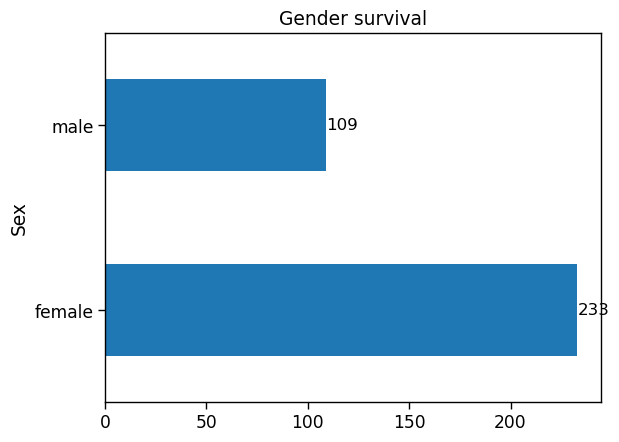

In [141]:
sex_plot=df.groupby("Sex")["Survived"].sum().plot.barh(title="Gender survival")
plt.bar_label(sex_plot.containers[0],size=12)
plt.show()

In [142]:
sex_plot.figure.savefig("Sex survival.png")

In [143]:
mask_survived=df["Survived"]==1
df[mask_survived]["Sex"].value_counts().plot.pie(autopct="%1.1f%%",
                                                labels=["Female", "Male"],
                                                shadow=True,
                                                startangle=90,
                                                figsize=(6, 6),
                                                explode=(0.1,0),
                                                title="Survival Distribution by Gender",
                                                 ylabel="")

<Axes: title={'center': 'Survival Distribution by Gender'}>

C:\Users\telet\anaconda3\Lib\site-packages\seaborn\categorical.py:379: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


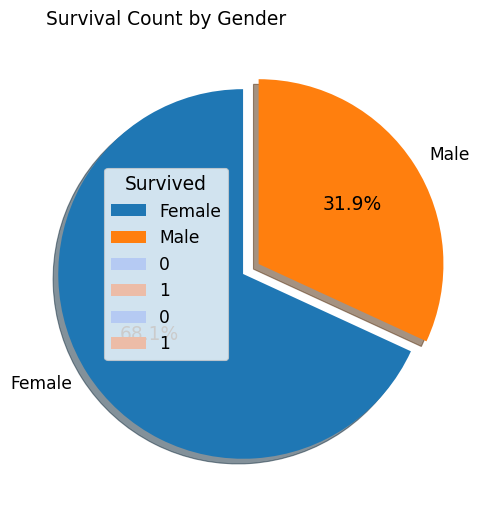

In [145]:
#sau
#or
plot2=sns.countplot(data=df,x="Sex",hue="Survived",palette="coolwarm")
plt.bar_label(plot2.containers[1])
plt.title("Survival Count by Gender")
plt.show()

In [146]:
plot2.figure.savefig("Survival Count by Gender.png")


## Analiza supravietuirii in functie de varsta
## Survival analysis by age

In [147]:
df["Age"].describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [148]:
df.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [149]:
group_age=df.groupby(["Survived", "Sex"]).agg({"Age":("count","min","max")})
group_age

Age            
                count   min   max
Survived Sex                     
0        female    81  2.00  57.0
         male     468  1.00  74.0
1        female   233  0.75  63.0
         male     109  0.42  80.0

In [150]:
group_age.to_csv("group_age.csv")

<Figure size 700x400 with 0 Axes>

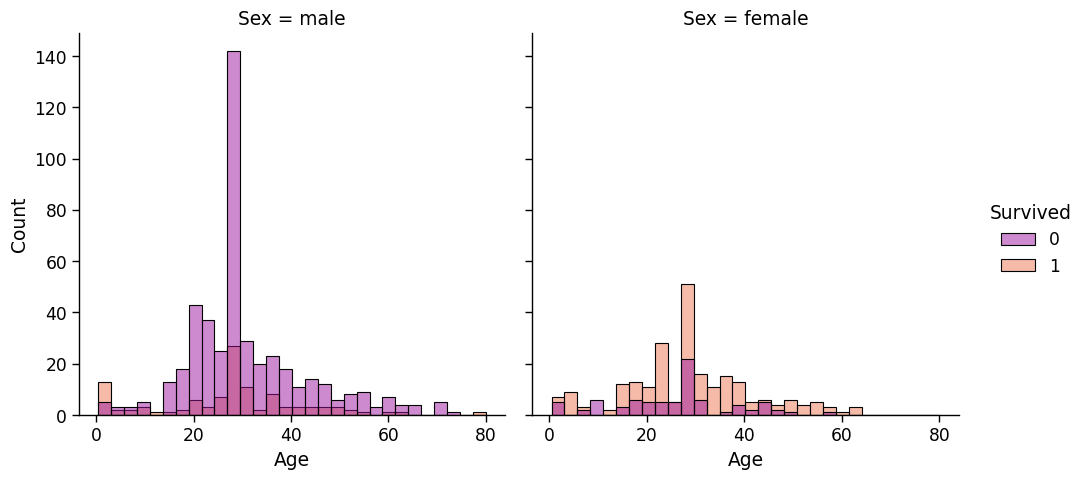

<Figure size 700x400 with 0 Axes>

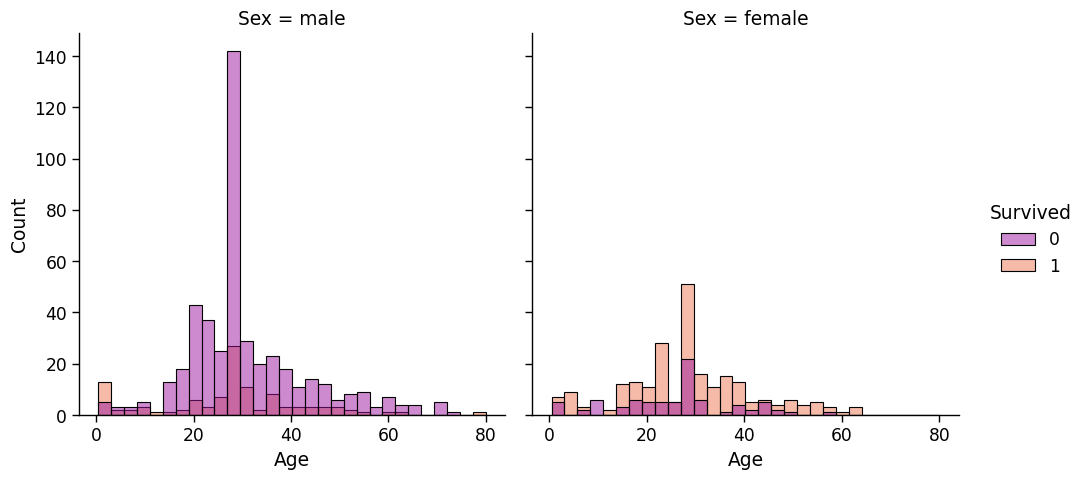

In [152]:
plt.figure(figsize=(7,4))
sns.displot(data=df, x="Age", hue="Survived", col="Sex", palette="plasma")
plt.show()

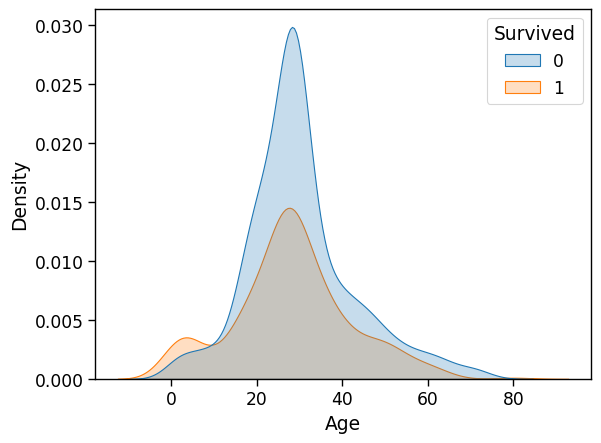

In [153]:
# corelatia dintre varsta si supravietuire
# correlation between age and survival
plot4=sns.kdeplot(data=df, x="Age", hue="Survived",fill=True)
plt.show()


In [154]:
plot4.figure.savefig("Histograma Survival_Age.png",bbox_inches="tight")

In [155]:
# segmentarea coloanei Age pe categorii de varsta
# Age column segmentation by age groups
def age_category(age):
    if age< 12:
        return "children"
    elif age<18:
        return "teenagers"
    elif age<35:
        return "young adults"
    elif age<55:
        return "adults"
    else:
        return "seniors"
    

In [156]:
df["age_category"]=df["Age"].apply(age_category)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category,family_size,passanger_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,young adults,1,accompanied passanger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adults,1,accompanied passanger
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,young adults,0,solo passanger
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adults,1,accompanied passanger
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adults,0,solo passanger


In [157]:
df.groupby("age_category")["Survived"].sum()

age_category
adults           81
children         39
seniors          13
teenagers        22
young adults    187
Name: Survived, dtype: int64

In [158]:
piv_age_category=df.pivot_table(index="age_category",columns=["Survived", "Sex"],values="Age",aggfunc="count", margins=True)
piv_age_category

Survived          0           1       All
Sex          female male female male     
age_category                             
adults           15   97     56   25  193
children         13   16     19   20   68
seniors           1   28      9    4   42
teenagers         4   19     19    3   45
young adults     48  308    130   57  543
All              81  468    233  109  891

In [159]:
piv_age_category.to_csv("piv_age.csv")

In [160]:
# pasagerul cel mai tanar
# youngest passenger

df.loc[df["Age"].idxmin()]

PassengerId                                       804
Survived                                            1
Pclass                                              3
Name                  Thomas, Master. Assad Alexander
Sex                                              male
Age                                              0.42
SibSp                                               0
Parch                                               1
Ticket                                           2625
Fare                                           8.5167
Embarked                                            C
age_category                                 children
family_size                                         1
passanger_category              accompanied passanger
Name: 803, dtype: object

In [161]:
# pasagerul cel mai in varsta
# oldest passenger

df.loc[df["Age"].idxmax()]

PassengerId                                            631
Survived                                                 1
Pclass                                                   1
Name                  Barkworth, Mr. Algernon Henry Wilson
Sex                                                   male
Age                                                   80.0
SibSp                                                    0
Parch                                                    0
Ticket                                               27042
Fare                                                  30.0
Embarked                                                 S
age_category                                       seniors
family_size                                              0
passanger_category                          solo passanger
Name: 630, dtype: object

In [162]:
piv_age=piv_age_category.plot.barh()

In [163]:
piv_age.figure.savefig("Age category.png",bbox_inches="tight")

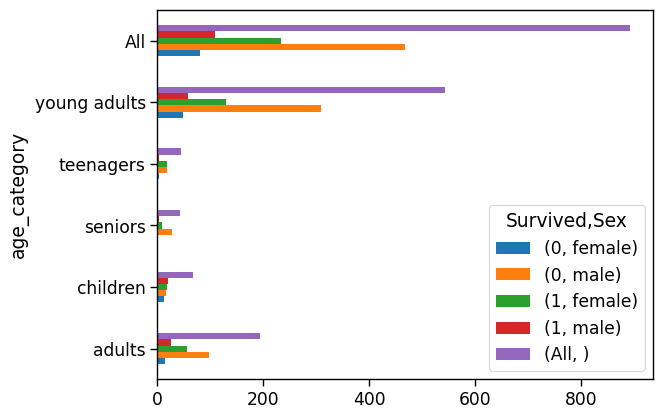

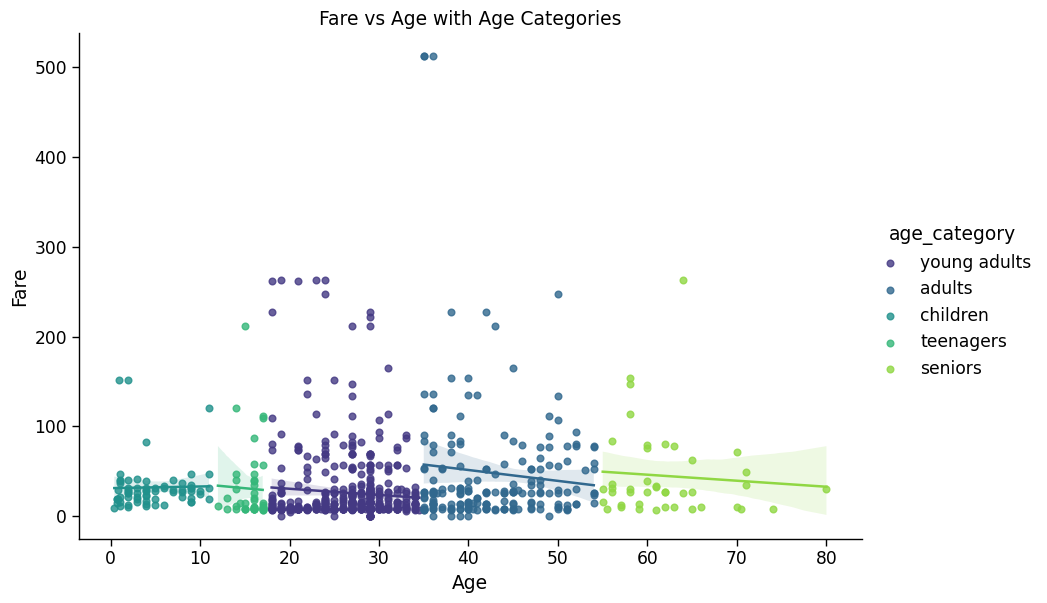

In [164]:
plot_age_fare=sns.lmplot(data=df, x="Age", y="Fare", hue="age_category", palette="viridis", height=6, aspect=1.5)
plt.title("Fare vs Age with Age Categories")
plt.show()

In [165]:
plot_age_fare.figure.savefig("Age_Fare.png",bbox_inches="tight")

In [166]:
# concluzie: femeile si pasagerii mai tineri au avut sanse mai mari de supravituire
# conclusion: Women and younger passengers had a higher chance of survival.

## Relatia dintre supravietuire si numarul de rude la bord
## The relationship between survival and the number of relatives on board

In [167]:
# Obiectiv: Să determinăm dacă pasagerii care călătoreau cu rude au avut șanse mai mari de supraviețuire.
# Metodă: Segmentarea datelor după SibSp și Parch și calcularea ratei medii de supraviețuire, precum și crearea unor categorii
# cum ar fi „călător singur” vs. „călător însoțit”.
# Objective: To determine if passengers traveling with relatives had a higher chance of survival.
# Method: Segmenting the data by SibSp and Parch and calculating the average survival rate, as well as creating categories such as "traveling alone" 
# vs. "traveling accompanied"

In [168]:
df["family_size"]=df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category,family_size,passanger_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,young adults,1,accompanied passanger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adults,1,accompanied passanger
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,young adults,0,solo passanger
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adults,1,accompanied passanger
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adults,0,solo passanger


In [169]:
df.groupby("family_size")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
family_size,,,,,,,,
0,537.0,0.303538,0.460214,0.0,0.0,0.0,1.0,1.0
1,161.0,0.552795,0.498756,0.0,0.0,1.0,1.0,1.0
2,102.0,0.578431,0.496249,0.0,0.0,1.0,1.0,1.0
3,29.0,0.724138,0.454859,0.0,0.0,1.0,1.0,1.0
4,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0
5,22.0,0.136364,0.351250,0.0,0.0,0.0,0.0,1.0
6,12.0,0.333333,0.492366,0.0,0.0,0.0,1.0,1.0
7,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [170]:
survival_by_family=df.groupby("family_size")["Survived"].sum()
survival_by_family 

family_size
0     163
1      89
2      59
3      21
4       3
5       3
6       4
7       0
10      0
Name: Survived, dtype: int64

In [171]:
survival_by_family.to_csv("Family_suvival.csv")

In [172]:
family=df.groupby("family_size")["Name"].count()
family

family_size
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Name, dtype: int64

In [173]:
family.to_csv("Family.csv")


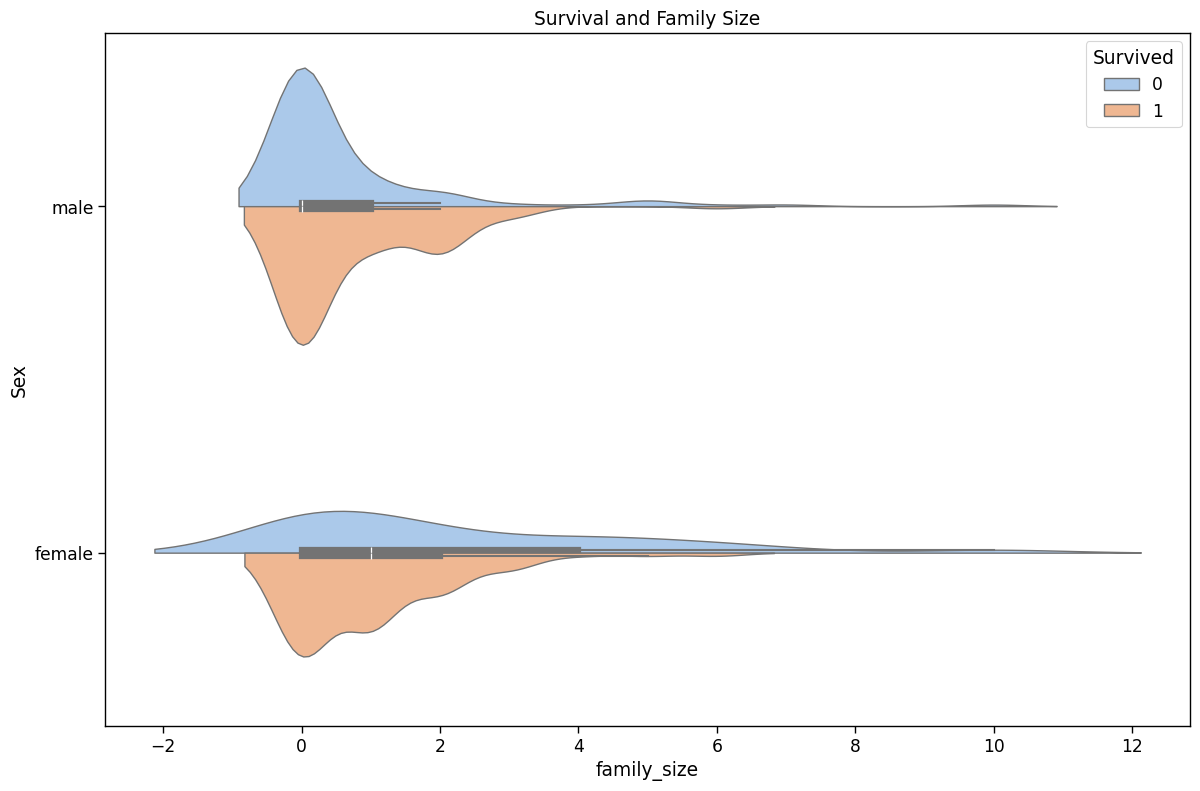

In [174]:
plt.figure(figsize=(14,9))
plot5=sns.violinplot(data=df,
               x="family_size",
               y="Sex",
               hue="Survived",
               palette="pastel",
               split=True)
plt.title("Survival and Family Size")
plt.show()

In [175]:
plot5.figure.savefig("Family size.png")

In [176]:
# segmentarea coloanei "Family_size" pe categorii „călător singur” vs. „călător însoțit”.
# segmenting the 'Family_size' column into categories 'traveling alone' vs. 'traveling accompanied'.
def passanger_cat (family_size):
    if family_size==0:
        return "solo passanger"
    else:
        return "accompanied passanger"
    

In [177]:
df["passanger_category"]=df["family_size"].apply(passanger_cat)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category,family_size,passanger_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,young adults,1,accompanied passanger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adults,1,accompanied passanger
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,young adults,0,solo passanger


In [178]:
# corelatia dintre varsta si supravietuire
# correlation between age and survival
plot_pas=sns.countplot(data=df,x="passanger_category",hue="Survived",palette="cividis")
plt.title("Survival Count by Passenger Category")

Text(0.5, 1.0, 'Survival Count by Passenger Category')

In [179]:
plot_pas.figure.savefig("Passenger Category", bbox_inches="tight")

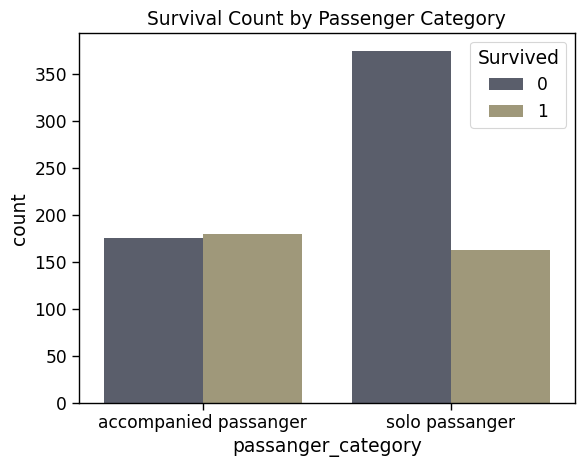

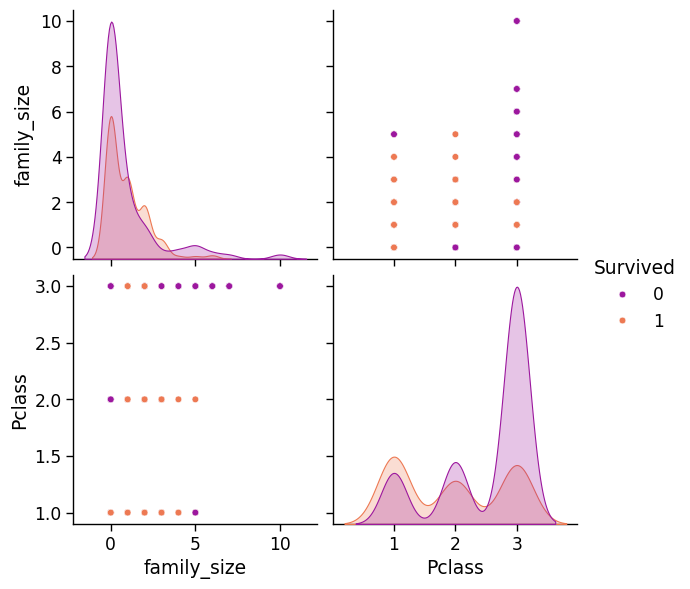

In [180]:
plot_8=sns.pairplot(data=df, hue="Survived", palette="plasma", vars=["family_size",  "Pclass"], kind="scatter", diag_kind="kde", height=3, aspect=1)
plt.show()

In [181]:
plot_8.figure.savefig("PClass_family_size.png",bbox_inches="tight")

## Analiza supravietuirii în functie de tarife si clasa de călătorie (Pclass)
## Analysis of survival based on fares and travel class (Pclass)

In [182]:
# Obiectiv: Să determinăm dacă pasagerii din anumite clase de călătorie au avut șanse mai mari de supraviețuire.
# Metodă: Calcularea ratei de supraviețuire per clasă
# Objective: To determine if passengers in certain travel classes had a higher chance of survival.
# Method: Calculating the survival rate per class"

In [183]:
survival_by_class = df.groupby("Pclass")["Survived"].mean()
survival_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [184]:
survivor_no=df["Survived"].sum()
survivor_class=df.groupby("Pclass")["Survived"].sum()
survival_rate=(survivor_class/survivor_no*100).round(2)
print(survival_rate)

Pclass
1    39.77
2    25.44
3    34.80
Name: Survived, dtype: float64


In [185]:
survival_by_fare=df.groupby("Fare")["Survived"].mean()
survival_by_fare

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64

In [186]:
survivor_no=df["Survived"].sum()
survivor_fare=df.groupby("Fare")["Survived"].sum()
survival_rate=survivor_fare/survivor_no*100
print(survival_rate)

Fare
0.0000      0.292398
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.877193
247.5208    0.292398
262.3750    0.584795
263.0000    0.584795
512.3292    0.877193
Name: Survived, Length: 248, dtype: float64


In [187]:
df.groupby("Pclass").agg({"Fare":["mean","max","count"]})

Fare                
             mean       max count
Pclass                           
1       84.154687  512.3292   216
2       20.662183   73.5000   184
3       13.675550   69.5500   491

In [188]:
df.pivot_table(index="Survived",columns="Pclass",values="PassengerId",aggfunc="count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


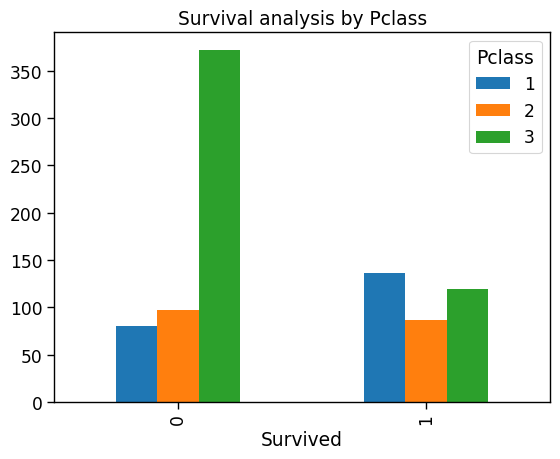

In [189]:
plot_pclass=df.pivot_table(index="Survived",columns="Pclass",values="PassengerId",aggfunc="count").plot.bar()
plt.title("Survival analysis by Pclass")
plt.show()

In [190]:
plot_pclass.figure.savefig("PClass distribution.png")

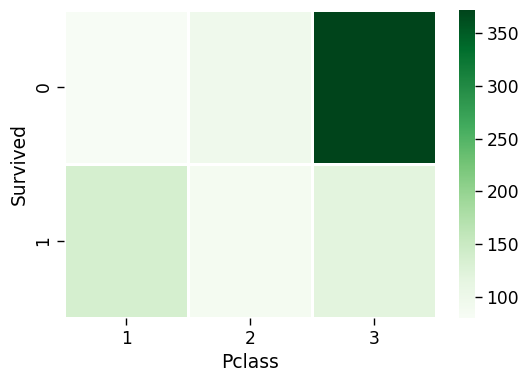

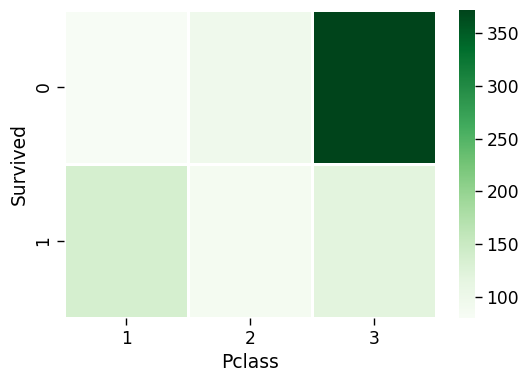

In [192]:
pclass=df.pivot_table(index="Survived",columns="Pclass",values="PassengerId",aggfunc="count")
plt.figure(figsize=(6,4))
sns.set_context("paper",font_scale=1.4)
plot_6=sns.heatmap(pclass,cmap="Greens",linecolor="white",linewidth=1)
plt.show()

In [193]:
plot_6.figure.savefig("PClass matrix.png",bbox_inches="tight")

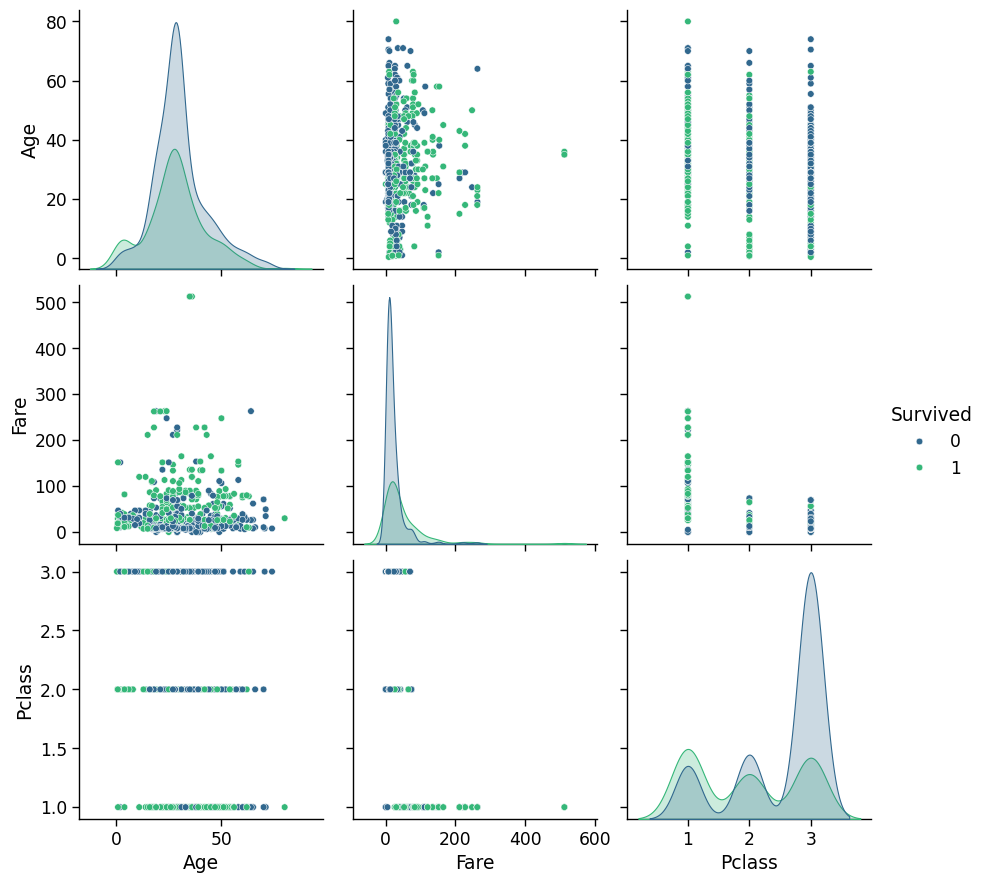

In [194]:

plot_7=sns.pairplot(data=df, hue="Survived", palette="viridis", vars=["Age", "Fare", "Pclass"], kind="scatter", diag_kind="kde", height=3, aspect=1)
plt.show()


In [195]:
plot_7.figure.savefig("PClass_fARE_Age.png",bbox_inches="tight")

In [196]:
# analiza supravietuirii in functie de age_category, Pclass si sex
# survival analysis by age, Pclass and gender
df.pivot_table(index="Survived",columns=["Pclass", "Sex"],values="PassengerId",aggfunc="count").plot.barh()
plt.title("Survival Count by Passenger Age Category & Gender")

Text(0.5, 1.0, 'Survival Count by Passenger Age Category & Gender')

In [197]:
piv_age_pclass=df.pivot_table(index="age_category",columns=["Survived", "Sex","Pclass"],values="PassengerId",aggfunc="count")
piv_age_pclass

Survived          0                                    1                    \
Sex          female             male              female              male   
Pclass            1    2     3     1     2      3      1     2     3     1   
age_category                                                                 
adults          1.0  2.0  12.0  28.0  25.0   44.0   36.0  17.0   3.0  21.0   
children        1.0  NaN  12.0   NaN   NaN   16.0    NaN   8.0  11.0   3.0   
seniors         NaN  1.0   NaN  17.0   5.0    6.0    7.0   1.0   1.0   3.0   
teenagers       NaN  NaN   4.0   NaN   2.0   17.0    7.0   4.0   8.0   1.0   
young adults    1.0  3.0  44.0  32.0  59.0  217.0   41.0  40.0  49.0  17.0   

Survived                 
Sex                      
Pclass          2     3  
age_category             
adults        1.0   3.0  
children      9.0   8.0  
seniors       1.0   NaN  
teenagers     NaN   2.0  
young adults  6.0  34.0

## Analiza supravietuirii in functie de portul de imbarcare
## Survival analysis by Embarked

In [203]:
survival_embarked = df.groupby("Embarked")["Survived"].mean()
survival_embarked

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [204]:
survivor_no = df["Survived"].sum()
survivor_embarked=df.groupby("Embarked")["Survived"].sum()
survival_rate=(survivor_embarked/survivor_no*100).round(2)
print(survival_rate)

Embarked
C    27.19
Q     8.77
S    64.04
Name: Survived, dtype: float64


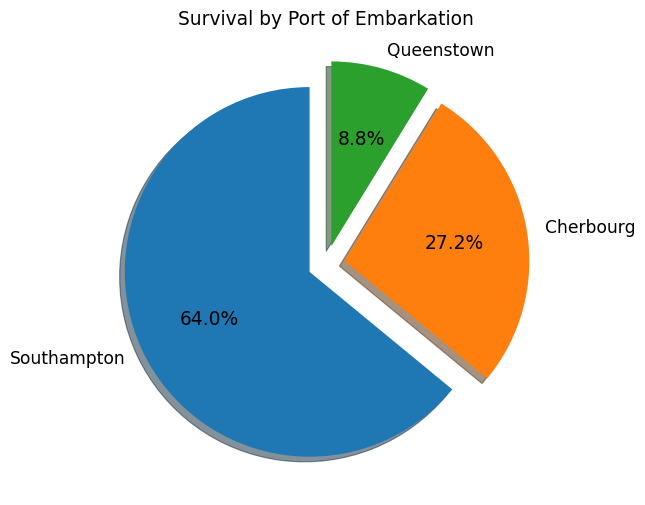

In [205]:
mask_survived=df["Survived"]==1
plot_8=df[mask_survived]["Embarked"].value_counts().plot.pie(autopct="%1.1f%%",
                                                labels=["Southampton", "Cherbourg", "Queenstown"],
                                                shadow=True,
                                                startangle=90,
                                                figsize=(6, 6),
                                                explode=(0.1,0.1,0.1),
                                                title="Survival by Port of Embarkation",
                                                 ylabel="")
plt.show()

In [206]:
plot_8.figure.savefig("Survival Embarked.png",bbox_inches="tight")

In [207]:
df.pivot_table(index="Survived", columns="Embarked", values="PassengerId", aggfunc="count")

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


In [208]:
df.groupby(["Embarked","Survived","Pclass"]).agg({"Sex":"count",
                                                   "Age":"mean"})

Sex        Age
Embarked Survived Pclass                
C        0        1        26  40.615385
                  2         8  29.437500
                  3        41  27.207317
         1        1        59  35.033898
                  2         9  18.222222
                  3        25  17.836800
Q        0        1         1  44.000000
                  2         1  57.000000
                  3        45  28.455556
         1        1         1  33.000000
                  2         2  28.500000
                  3        27  25.481481
S        0        1        53  40.764151
                  2        88  33.289773
                  3       286  26.916084
         1        1        76  34.248947
                  2        76  26.853026
                  3        67  23.238806

In [209]:
df.pivot_table(index="Embarked",columns=["Pclass","Sex"],values="PassengerId",aggfunc="count")

Pclass        1           2           3     
Sex      female male female male female male
Embarked                                    
C            43   42      7   10     23   43
Q             1    1      2    1     33   39
S            50   79     67   97     88  265

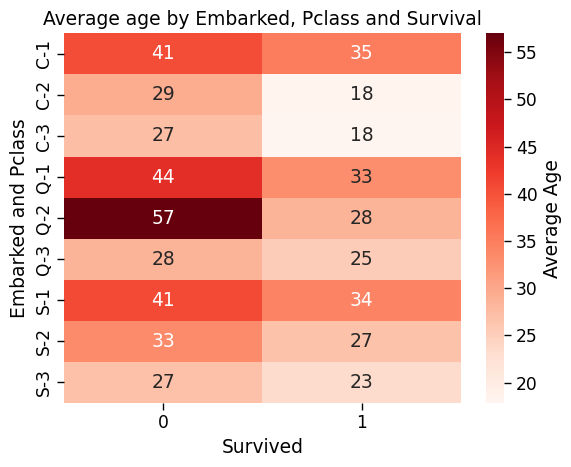

In [211]:
# Pivotare pentru a crea o matrice pentru heatmap
emb_pivot = df.pivot_table(values="Age", index=["Embarked", "Pclass"], columns="Survived")

# Heatmap pentru a vizualiza media vârstei
# Heatmap for average of age
sns.heatmap(emb_pivot, annot=True, cmap="Reds", cbar_kws={'label': 'Average Age'})
plt.title("Average age by Embarked, Pclass and Survival")
plt.xlabel("Survived")
plt.ylabel("Embarked and Pclass")
plt.show()


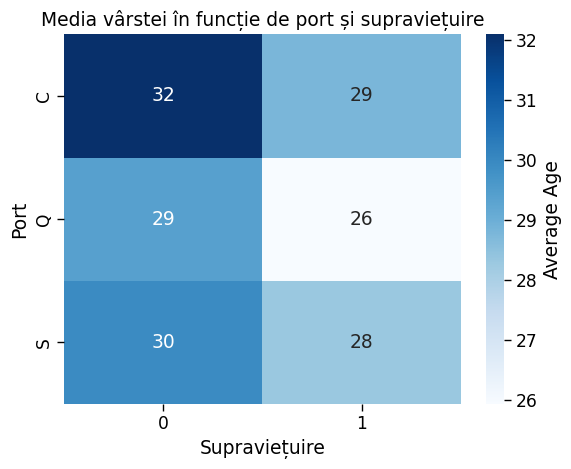

In [116]:
# Pivotare pentru a crea o matrice pentru heatmap
emb_pivot = df.pivot_table(values="Age", index=["Embarked"], columns="Survived")

# Heatmap pentru a vizualiza media vârstei
sns.heatmap(emb_pivot, annot=True, cmap="Blues", cbar_kws={'label': 'Average Age'})
plt.title("Media vârstei în funcție de port și supraviețuire")
plt.xlabel("Supraviețuire")
plt.ylabel("Port")
plt.show()

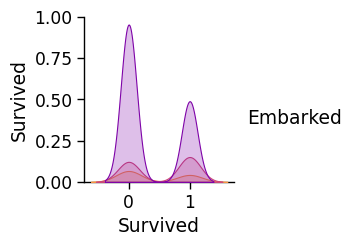

In [212]:
df_embarked=df[["Embarked","Sex","Survived"]]
sns.pairplot(df_embarked,hue="Embarked",palette="plasma",markers=["^","s"])
plt.show()

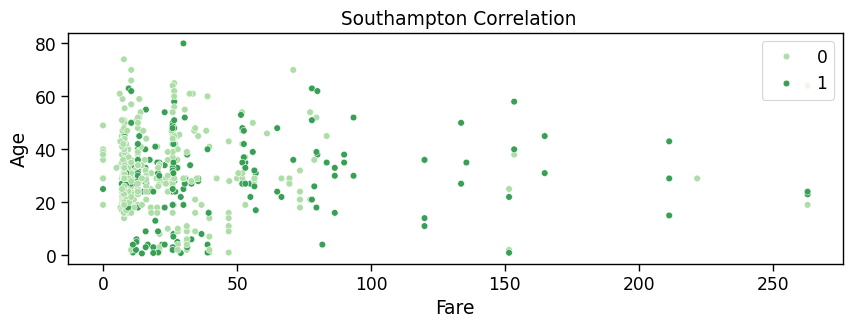

In [213]:
mask_s=df["Embarked"]=="S"
plt.figure(figsize=(10,3))
plot_s=sns.scatterplot(data=df[mask_s],
                x="Fare",
                y="Age",
                hue="Survived",
                sizes=(0,900),
                palette="Greens")
plt.title(" Southampton Correlation")
plt.legend(loc="upper right")
plt.show()

In [214]:
plot_s.figure.savefig("Southampton.png")

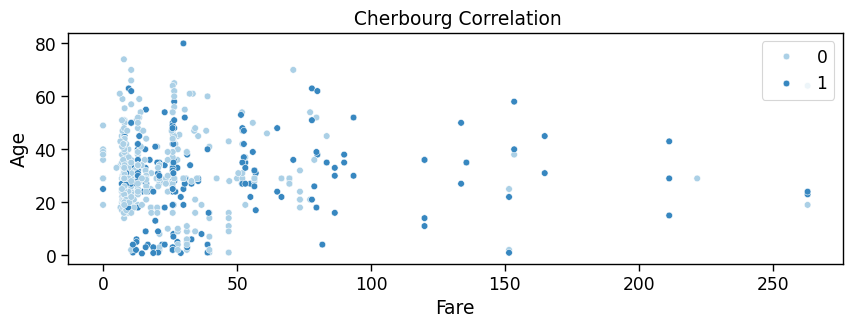

In [215]:
mask_c=df["Embarked"]=="C"
plt.figure(figsize=(10,3))
plot_c=sns.scatterplot(data=df[mask_s],
                x="Fare",
                y="Age",
                hue="Survived",
                sizes=(0,900),
                palette="Blues")
plt.title(" Cherbourg Correlation")
plt.legend(loc="upper right")
plt.show()

In [216]:
plot_c.figure.savefig("Cherbourg.png")

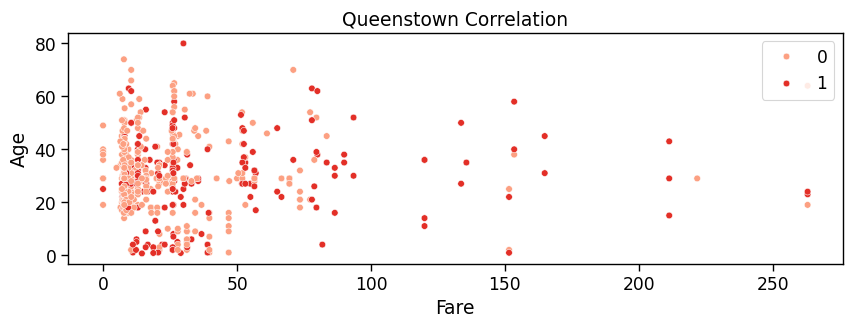

In [217]:
mask_c=df["Embarked"]=="Q"
plt.figure(figsize=(10,3))
plot_q=sns.scatterplot(data=df[mask_s],
                x="Fare",
                y="Age",
                hue="Survived",
                sizes=(0,900),
                palette="Reds")
plt.title("Queenstown Correlation")
plt.legend(loc="upper right")
plt.show()

In [218]:
plot_q.figure.savefig("Queenstown.png")

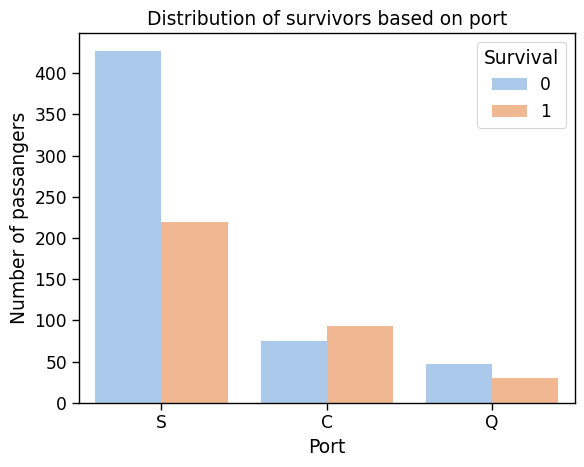

In [221]:
sns.countplot(data=df, x="Embarked", hue="Survived", palette="pastel")
plt.title("Distribution of survivors based on port")
plt.xlabel("Port")
plt.ylabel("Number of passangers")
plt.legend(title="Survival")
plt.show()


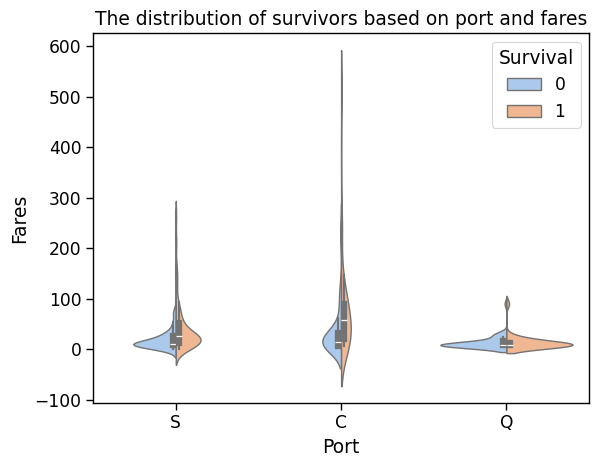

In [223]:
plot_11=sns.violinplot(data=df, x="Embarked", y="Fare", hue="Survived", split=True, palette="pastel")
plt.title("The distribution of survivors based on port and fares")
plt.xlabel("Port")
plt.ylabel("Fares")
plt.legend(title="Survival")
plt.show()


In [224]:
plot_11.figure.savefig("Supravituire_tarife si Porturi.png",bbox_inches="tight")

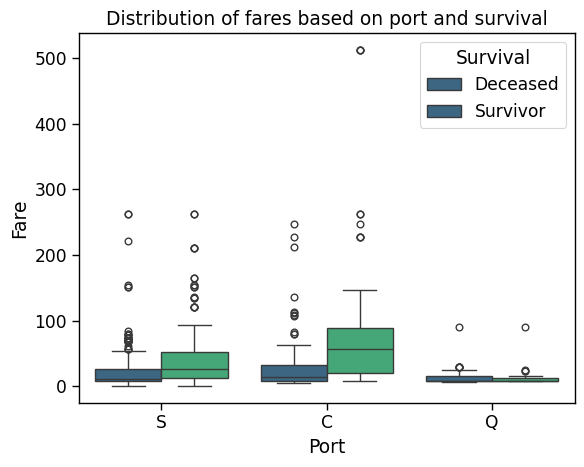

In [226]:

plot_10=sns.boxplot(data=df, x="Embarked", y="Fare", hue="Survived", palette="viridis")
plt.title("Distribution of fares based on port and survival")
plt.xlabel("Port")
plt.ylabel("Fare")
plt.legend(title="Survival", labels=["Deceased", "Survivor"])
plt.show()


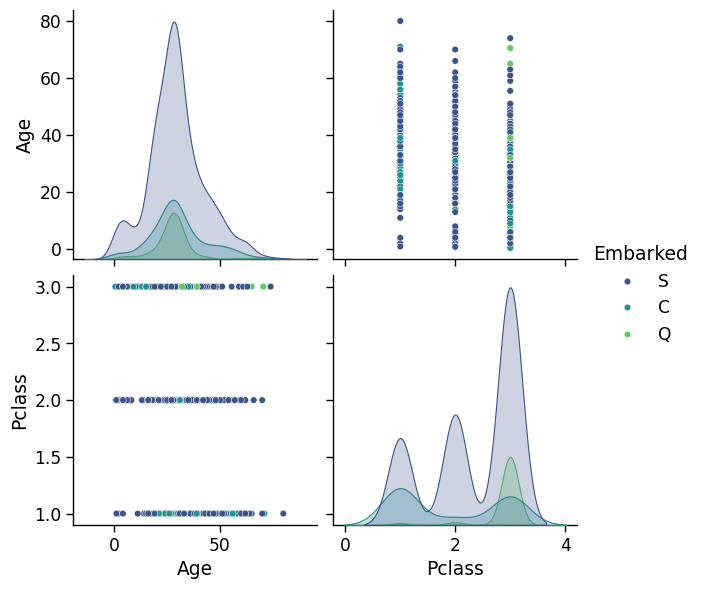

In [227]:
plot_9=sns.pairplot(data=df, hue="Embarked", palette="viridis", vars=["Age", "Pclass"], kind="scatter", diag_kind="kde", height=3, aspect=1)
plt.show()

In [228]:
plot_9.figure.savefig("Porturi.png")

In [229]:
plot_10.figure.savefig("Supravituire si Porturi.png",bbox_inches="tight")

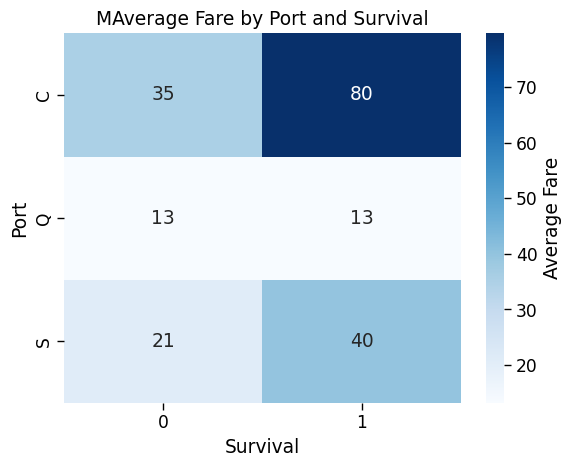

In [231]:
# Pivotare pentru a crea o matrice pentru heatmap
emb_pivot = df.pivot_table(values="Fare", index=["Embarked"], columns="Survived")

# Heatmap pentru a vizualiza media vârstei
plot_12=sns.heatmap(emb_pivot, annot=True, cmap="Blues", cbar_kws={'label': "Average Fare"})
plt.title("MAverage Fare by Port and Survival")
plt.xlabel("Survival")
plt.ylabel("Port")
plt.show()

In [132]:
plot_12.figure.savefig("Matrice porturi.png",bbox_inches="tight")

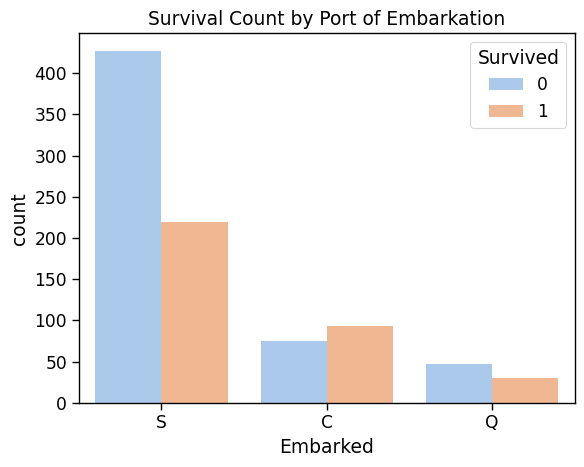

In [232]:
#corelatia dintre port si supravietuire
#correlation between port and survival
plot_13=sns.countplot(data=df,x="Embarked",hue="Survived",palette="pastel")

plt.title("Survival Count by Port of Embarkation")
plt.show()

In [233]:
plot_13.figure.savefig("Supravietuire porturi.png",bbox_inches="tight")